* 2.2 신경망을 위한 데이터 표현(61p)
* 2.3 신경망의 톱니바퀴: 텐서 연산(70p)
* 2.4 신경망의 엔진: 그레디언트 기반 최적화(79p)


# Preview

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

--------------------

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [4]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2546 - accuracy: 0.9267
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.1038 - accuracy: 0.9697
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0683 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0379 - accuracy: 0.9887


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 39us/step


In [9]:
print('test_acc:', test_acc)

test_acc: 0.9797999858856201


----------------

# 2.2 신경망을 위한 DATA 표현

최근 모든 machine learning model은 tensor를 기본 data 구조로 사용한다
- "tensor는 수치형 data를 위한 container다"
- tensor는 임의의 차원 개수를 가지는 행렬의 일반화된 모습
- dimesion을 종종 axis(축)이라 부름

## 1) 0D tensor(scalar)
- numpy 배열 스칼란는 수정할 수 없는 **0차원의 numpy 배열**
- 하나의 숫자만 담고 있는 tensor
- numpy에서는 float32sk float64타입의 숫자가 scalar tensor

> tensor의 축 개수 "rank"라고 부름   
> * 주의! 선형대수의 독립 행, 열을 나타내는 rank

In [3]:
import numpy as np
x=np.array(12)

In [4]:
x

array(12)

In [5]:
#array의 축 개수
x.ndim

0

## 2) Vector(1D tensor)
- 숫자의 배열을 vector라 한다
- 딱 하나의 축을 가진다

In [39]:
x_2=np.array([12,3,6,14,7])

In [42]:
#dmension
x_2.shape

(5,)

In [43]:
#rank
x_2.ndim

1

In [16]:
x_2.dtype

dtype('int32')

- 5개의 원소를 가지므로, 5차원 vector라고 한다
> **TIP**
>1. 5D vector는 하나의 축을 따라 5개의 차원을 가짐
>2. 5D tensor는 5개의 축을 가진 것

# 3) Matrix(2D tensor)
- matrix에는 2개의 축이 있다
- 보통 행(row)과 열(column)이라 함


In [45]:
x_3=np.array([[5,78,34,0],
             [6,79,3,35],
             [7,80,4,36]])

In [21]:
x_3.shape

(3, 4)

In [23]:
x_3.ndim

2

In [46]:
x_3.dtype

dtype('int32')

- 첫번째 축에 놓여있는 원소를 row라 함
- 두번째 축에 놓여있는 원소를 column이라 함

이후 3차원 tensor와 고차원 tensor로 이어짐

## property
1. **rank**: 축의 개수
    - 3D tensor에는 축 3개, 2D tensor에는 축 2개
2. **shape**
    - 각 축을 따라 얼마나 많은 demension이 있는지를 나타낸 파이썬 튜플이다
    - array scalar는 ()처럼 크기가 없다
3. **data type**
    - dtype에 저장
    - int32, unit8, float64 등
    - tensor는 numpy array의 문자열을 지원하지 않음

In [24]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
print(train_images.ndim)

3


In [26]:
train_images.shape

(60000, 28, 28)

In [28]:
train_images.dtype

dtype('uint8')

8 bit 정수형 3D tensor

## Numpy로 tensor 조작하기
#### Slicing
- array에 있는 특정원소들을 선택하는 것

In [29]:
my_slice=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [31]:
my_slice=train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice=train_images[:,14:,14:]
my_slice.shape

(60000, 14, 14)

## 배치 data
- 일반적으로 deeplearning에서 사용하는 모든 data tensor의 첫번째 축은 sample 축이다
- deeplearning model은 한번에 전체 data set을 처리 하지 않음
- 데이터를 작은 배치로 나눠 돌림
```
batch=train_images[128*n:128*(n+1)]
```

In [38]:
batch=train_images[:128]

In [39]:
batch.shape

(128, 28, 28)

이런 batch data를 다룰때 첫번째 축을 batch axis 또는 batch dimension이라 부름

## tensor 실제 사례
- vector data:(samples, features)크기의 2D tensor
    + 첫번째 축은 sample 축, 두번째는 feature 축
- 시계열 data 또는 sequence data:(samples, timesteps, features)크기의 3D tensor
    +  시간 축 포함
- image:(samples, height, width, channels) or (samples, channels, height, width) 4D tensor
    + (128, 256, 256, 1) -> 흑백 DATA
    + (128, 256, 256, 3) -> Color data
- 동영상:(samples,frames, height, width, channels) 5D tensor

----------------------------------------

# 2.3 신경망의 톱니바퀴: tensor 연산

`keras.layers.Dense(512, activation='relu')`는;   
2D tensor를 입력으로 받고 입력 tensor의 새로운 표현인 또다른 2D tensor를 반환하는 함수처럼 해석 가능

`output=relu(dot(w,input)+b)`

- w는 2D tensor이고, b는 vector다
- 첫번째 내적, 두번쨰 덧셈, 세번째 relu
- relu 연산은 함수 input이 0보다 크면 입력을 그대로 반환하고 0보다 작으면 0을 반환

In [21]:
w=[2,1]
input=[1,3]
b=1

w=np.array(w)
input=np.array(input)

#relu(dot(w,input)+b)
output=max(np.dot(w,input)+b,0)
print(output)

6


## 원소별 연산(element-wise operation)
- for 반복문 사용
- 병렬화하기 쉽다

In [51]:
x.shape

(32, 10)

In [22]:
def naive_relu(x):
    assert len(x.shape)==2
    
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]=max(x[i,j],0)
            
    return x


In [26]:
def naive_add(x,y):
    assert len(x.shape)==2
    assert x.shape==y.shape
    
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
            
    return x

이 일을 굳이 할 필요없다! numpy가 다 해주니깐


In [29]:
import numpy as np

z= x+y

z=np.maximum(z,0.)

## 브로드 캐스팅 broadcasting

- naive와 Dense 연산을 비교해보자;    
    naive는 동일한 크기의 2D tensor만 지원,그러나 Dense에선 2D tensor와 vector를 더함


- 크기가 다른 두 tensor를 연산하면 broadcasting된다!

    1. 큰 tensor의 ndim에 맞도록 작은 텐서에 축이 추가 됨
    2. 작은 tensor가 새 축을 따라서 큰 tensor 크기에 맞도록 반복
    

In [33]:
# ex)
x=np.ones((32,10))
y=np.ones((10,))

assert len(x.shape)==2
assert len(x.shape)==2
assert x.shape[1]==y.shape[0]

x=x.copy()
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x[i,j]+=y[j]


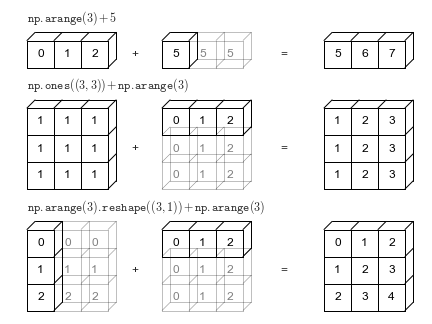

In [34]:
x=np.random.random((64,3,32,10))
y=np.random.random((32,10))

z=np.maximum(x,y)

In [50]:
#cf)
c=[1,2,3]
a=np.array(c)
b=np.array([1,2])


In [48]:
a.shape

(3,)

In [49]:
b.shape

(2,)

>NOTE   
> Broadcasting을 위해서는 axis가 늘릴수 있어야함

## tensor 점곱
-dot 연산자 사용

In [38]:
import numpy as np

x=np.random.random((32,10))
y=np.random.random((10,))

z=np.dot(x,y)

- 두 vetor의 점곱은 스칼라가 되므로 원소